<div align='center'>
    <h1>线形的积分方程及其矩量法实现</h1>
</div>

<h2>积分方程<h2>

对平面结构而言，通过坐标变换，
$$
\left(
\begin{array}{c}
x_0\\y_0
\end{array}
\right)
=
\left(
\begin{array}{cc}
\hat{t}_{m,x} & \hat{t}_{m,y}\\
\hat{a}_{m,x} & \hat{a}_{m,y}
\end{array}
\right)
\left(
\begin{array}{c}
x_0-x_{m-1}\\y_0-y_{m-1}
\end{array}
\right)
$$
其中，$(x_0,y_0)$是平面上外部一点在新的局部坐标系下的坐标。

于是可以矩形网格上的内层积分
\begin{equation}
\begin{array}{rl}
I
=&
\int_{-a_m/2}^{a_m/2} \int_0^{l_m} \dfrac{x}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy
\\
=&
\int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{x-x_0}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy
+
x_0\int_{-a_m/2}^{a_m/2}  \int_0^{l_m}
\dfrac{1}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
=&
\int_{-a_m/2}^{a_m/2}\sqrt{(x-x_0)^2+(y-y_0)^2}dy\left|_{x=0}^{x=l_m}\right.
+
x_0I_0(x_0,y_0)
\end{array}
\end{equation}

进而，利用极坐标变换，可以得到$I_0$的计算公式
\begin{equation}
\begin{array}{rl}
I_0 = 
& \int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{1}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
= &
\sum_{i=0}^3 \hat{P}_i \cdot \hat{u}_i P_i \log \dfrac{R_i^++l_i^+}{R_i^-+l_i^-}\\
= 
&
x_0 \ln \dfrac{R_1+a_m/2-y_0}{R_0-a_m/2-y_0}
+
(a_m/2-y_0) \ln \dfrac{R_2+l_m-x_0}{R_1-x_0}\\
&+
(l_m-x_0) \ln \dfrac{R_3+a_m/2+y_0}{R_2-a_m/2+y_0}
+
(a_m/2+y_0) \ln \dfrac{R_0+x_0}{R_3-l_m+x_0}
\end{array}
\end{equation}
其中
\begin{equation}
\begin{array}{rcl}
	R_0 &=& \sqrt{x_0^2 + (y_0+a_m/2)^2 }\\
	R_1 &=& \sqrt{x_0^2 + (y_0-a_m/2)^2}\\
	R_2 &=& \sqrt{(x_0-l_m)^2 + (y_0-a_m/2)^2}\\
	R_3 &=& \sqrt{(x_0-l_m)^2 + (y_0+a_m/2)^2}
\end{array}
\end{equation}

当$x_0$或$y_0$很大时

\begin{equation}
\begin{array}{rl}
I_0 = 
& \int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{1}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
\approx&
\dfrac{1}{\sqrt{(x_0)^2+(y_0)^2}}\int_{-a_m/2}^{a_m/2} \int_0^{l_m} [1+ \dfrac{x_0 x}{x_0^2+y_0^2}]dxdy\\
\end{array}
\end{equation}

In [155]:
import numpy as np


def X0Y0(x_0,y_0,z_0,hl_m,ha_m,x_m1,y_m1,z_m1):
    '''
    实现将(x_0,y_0,z_0)在局部坐标系｛原点：(x_m1,y_m1,z_m1)，坐标抽{hl_m,ha_m}｝的投影
    '''
    try:
        x0 = hl_m[0]*(x_0-x_m1)+hl_m[1]*(y_0-y_m1)+hl_m[2]*(z_0-z_m1)
        x1 = ha_m[0]*(x_0-x_m1)+ha_m[1]*(y_0-y_m1)+ha_m[2]*(z_0-z_m1)
        return (x0,x1)
    except Exception as e:
        print e
        raise


def I0(x_0,y_0,a_m,l_m):
    '''
    实现在局部坐标系下第０类型的积分的解析计算
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    '''
    try:
        # 如果参数点离开矩形很远，则用高阶近似
        if np.abs(x_0) > 10. or np.abs(y_0) > 10.:　
            temp0 = x_0*x_0+y_0*y_0
            temp1 = l_m*a_m
            temp2 = l_m**2*a_m/2.*x_0/(temp0)
            return (temp1+temp2)/np.sqrt(temp0)
        # 如果参数点离矩形非常远，则用低阶近似
        if np.abs(x_0) > 100. or np.abs(y_0) > 100.:            
            temp0 = x_0*x_0+y_0*y_0
            temp1 = l_m*a_m
            return temp1/np.sqrt(temp0)
        # 如果参数点离矩形不远，则用精确的解析公式
        R_0 = np.sqrt(x_0**2 + (y_0+a_m/2.)**2)　
        R_1 = np.sqrt(x_0**2 + (y_0-a_m/2)**2)
        R_2 = np.sqrt((x_0-l_m)**2 + (y_0-a_m/2)**2)
        R_3 = np.sqrt((x_0-l_m)**2 + (y_0+a_m/2)**2)
        if np.abs(x_0) < 1.e-15:
            temp1 = 0.
        else:
            temp1 = x_0*np.log((R_1+a_m/2-y_0)/(R_0-a_m/2-y_0))
        if np.abs(a_m/2-y_0)< 1.e-15:
            temp2 = 0.
        else:
            temp2 = (a_m/2-y_0)*np.log((R_2+l_m-x_0)/(R_1-x_0))
        if np.abs(l_m-x_0)< 1.e-15:
            temp3 = 0.
        else:
            temp3 = (l_m-x_0)*np.log((R_3+a_m/2+y_0)/(R_2-a_m/2+y_0))
        if np.abs(a_m/2+y_0) < 1.e-15:
            temp4 = 0.
        else:
            temp4 = (a_m/2+y_0) *np.log((R_0+x_0)/(R_3-l_m+x_0))
#         raise
    
        return temp1+temp2+temp3+temp4
    except Exception as e:
        print e
        print temp1
        print temp2
        print temp3
        print temp4
        return temp1+temp2+temp3+temp4
    except RuntimeWarning as rw:
        print rw
        
        

# tt = np.linspace(-20,-1,num=1000)

# aa0 = [ I0(xx,-0.06,0.1,0.1) for xx in tt]
# aa = [ I0(xx,-0.05,0.1,0.1) for xx in tt]
# bb = [ I0(xx,-0.03,0.1,0.1) for xx in tt]
# cc = [ I0(xx,0,0.1,0.1) for xx in tt]
# import matplotlib.pylab as plt
# plt.plot(tt,aa0,'y-*',label="-0.06")
# plt.plot(tt,aa,'r-*',label="-0.05")
# plt.plot(tt,bb,'g-*',label="-0.03")
# plt.plot(tt,cc,'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()


于是
\begin{equation}
\begin{array}{rl}
&I_1 = \int_{-a_m/2}^{a_m/2}\sqrt{(xx-x_0)^2+(y-y_0)^2}dy\\
=
&\dfrac{(a_m/2-y_0)\sqrt{(xx-x_0)^2+(a_m/2-y_0)^2}}{2}
+\dfrac{(xx-x_0)^2\ln(\sqrt{(xx-x_0)^2+(a_m/2-y_0)^2}+a_m/2-y_0)}{2}\\
&+\dfrac{(a_m/2+y_0)\sqrt{(xx-x_0)^2+(a_m/2+y_0)^2}}{2}
-\dfrac{(xx-x_0)^2\ln(\sqrt{(xx-x_0)^2+(a_m/2+y_0)^2}-a_m/2-y_0)}{2}\\
\end{array}
\end{equation}

当$x_0$或$y_0$很大时，

\begin{equation}
\begin{array}{rl}
I
=&
\int_{-a_m/2}^{a_m/2} \int_0^{l_m} \dfrac{x}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy
\\
=&
\dfrac{1}{\sqrt{(x_0)^2+(y_0)^2}}\int_{-a_m/2}^{a_m/2} \int_0^{l_m} \dfrac{x\sqrt{(x_0)^2+(y_0)^2}}{\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
\approx&
\dfrac{1}{\sqrt{(x_0)^2+(y_0)^2}}\int_{-a_m/2}^{a_m/2} \int_0^{l_m} \dfrac{x}{\sqrt{1-
2(xx_0+yy_0)/(x_0^2+y_0^2)}}dxdy\\
\approx&
\dfrac{1}{\sqrt{(x_0)^2+(y_0)^2}}\int_{-a_m/2}^{a_m/2} \int_0^{l_m} x(1+
(xx_0+yy_0)/(x_0^2+y_0^2))dxdy\\
=&
\dfrac{1}{\sqrt{(x_0)^2+(y_0)^2}}\int_{-a_m/2}^{a_m/2} \int_0^{l_m} x+
\dfrac{x_0 x^2}{x_0^2+y_0^2}dxdy\\
\end{array}
\end{equation}

In [156]:
import numpy as np

def I1(xx, x_0,y_0,a_m,l_m):
    '''
    实现在局部坐标系下第１类型的积分的解析计算
    xx: 参数点的横坐标
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    '''
    try:
        # 判断积分函数不能化简
        if np.abs(xx-x_0) > 1.e-15:　# 不能化简
            a_m_2 = a_m/2.
            xx_x_0_2 = (xx-x_0)**2
            R_1 = np.sqrt( xx_x_0_2+ (y_0-a_m_2)**2)
            R_2 = np.sqrt(xx_x_0_2 + (y_0+a_m_2)**2)
            temp1 = xx_x_0_2*0.5*np.log(R_1+a_m_2-y_0)
            temp2 = -xx_x_0_2*0.5*np.log(R_2-a_m_2-y_0)
            temp3 = (a_m_2-y_0)*0.5*R_1
            temp4 = (a_m_2+y_0)*0.5*R_2
#             raise
            return temp1+temp2+temp3+temp4
        else:　# 能化简
            return a_m**2*0.25+y_0**2
            pass
    except Exception as e:
        print e       
        raise

def II(x_0,y_0,a_m,l_m):
    '''
    实现在局部坐标系下第Ｉ类型的积分的解析计算
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    '''
    try:
        # 如果距离很远
        if np.abs(x_0) >10. or np.abs(y_0) > 10.:
            temp0 = x_0*x_0+y_0*y_0
            temp1 = 0.5*l_m**2*a_m
            temp2 = l_m**3*a_m/3.*(x_0/(temp0))
            return (temp1+temp2)/np.sqrt(temp0)
        # 如果距离非常远
        if np.abs(x_0) >100. or np.abs(y_0) > 100.:
            temp0 = x_0*x_0+y_0*y_0
            temp1 = 0.5*l_m**2*a_m
            return temp1/np.sqrt(temp0)
        # 距离不是很远
        return I1(l_m, x_0,y_0,a_m,l_m)-I1(0, x_0,y_0,a_m,l_m)+x_0*I0(x_0,y_0,a_m,l_m)
    except Exception as e:
        print e
        raise

# tt = np.linspace(-100,10,num=1000)

# aa0 = [ II(xx,-0.06,0.1,0.1) for xx in tt]
# aa = [ II(xx,-0.05,0.1,0.1) for xx in tt]
# bb = [ II(xx,-0.03,0.1,0.1) for xx in tt]
# cc = [ II(xx,0,0.1,0.1) for xx in tt]
# import matplotlib.pylab as plt
# plt.plot(tt,aa0,'y-*',label="-0.06")
# plt.plot(tt,aa,'r-*',label="-0.05")
# plt.plot(tt,bb,'g-*',label="-0.03")
# plt.plot(tt,cc,'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()

# plt.show()

当$|kR|<0.1$
\begin{equation}
\dfrac{e^{-jkR}}{R}\approx \dfrac{1-jkR}{R}
\end{equation}
此时的相对误差范围是１％

同理
当$|k(R-R_0)|<0.1$
\begin{equation}
\dfrac{e^{-jkR}}{R}\approx \dfrac{1-jk(R-R_0)}{R}e^{-jkR_0}
\end{equation}
此时的相对误差范围是１％

那么，就有如下的假设成立
\begin{equation}
\begin{array}{rl}
&\int_{-a_m/2}^{a_m/2}\int_{0}^{l_m} \dfrac{xe^{-jkR}}{R}dxdy\\
\approx
&e^{-jkR_0}\int_{-a_m/2}^{a_m/2}\int_{0}^{l_m} \dfrac{x(1+jkR_0-jkR)}{R}dxdy\\
=
&e^{-jkR_0}[(1+jkR_0)\int_{-a_m/2}^{a_m/2}\int_{0}^{l_m} \dfrac{x}{R}dxdy
-jk\dfrac{l_m^2}{2}a_m]\\
\end{array}
\end{equation}

条件是在$[-a_m/2,a_m/2]\times[0,l_m]$内都有$|k(R-R_0)|<0.1$

In [157]:
'''
利用静态问题的解析公式计算动态问题的积分

下面两个公式要求网格的半径不大于0.1/k
'''
def I_ejkR(x_0,y_0,a_m,l_m,k):
    '''
    计算动态问题的第Ｉ型积分
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        R_0 = np.sqrt((x_0-l_m/2)**2+y_0**2)
    except Exception as e:
        print e
        raise
    try:
        # 判断是否足够近
        if R_0*k < 1.e-15:　# 是在内部
            # 采用简化公式
            return I(x_0,y_0,a_m,l_m)-1.j*k*l_m**2*a_m/2
        else:　# 不是在内部
            # 采用完整的公式
            temp1 = (1+1.j*k*R_0)
            temp2 = 1.j*k*l_m**2*a_m/2
            temp3 = II(x_0,y_0,a_m,l_m)*temp1
            return (temp3-temp2)*scipy.exp(-1.j*k*R_0)
    except Exception as e:
        print e
        raise
        
def I0_ejkR(x_0,y_0,a_m,l_m,k):    
    '''
    计算动态问题的第０型积分
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        R_0 = np.sqrt((x_0-l_m/2)**2+y_0**2)
    except Exception as e:
        print e
        raise
    try:       
        # 判断是否重合
        if (R_0)*k < 1.e-15:# 是
            # 采用简化公式
            return I0(x_0,y_0,a_m,l_m)-1.j*k*l_m*a_m
        else:# 否
            # 采用完整的公式
            temp1 = (1+1.j*k*R_0)
            temp2 = 1.j*k*l_m*a_m
            return (I0(x_0,y_0,a_m,l_m)*temp1-temp2)*scipy.exp(-1.j*k*R_0)
    except Exception as e:
        print e
        raise
        
# tt = np.linspace(-0.5,0.6,num=10000)

# aa0 = [ I0_ejkR(xx,0,0.1,0.1,0.5) for xx in tt]
# # aa = [ I0_ejkR(xx,-0.05,0.1,0.1,0.1) for xx in tt]
# # bb = [ I0_ejkR(xx,-0.03,0.1,0.1,0.1) for xx in tt]
# # cc = [ I0_ejkR(xx,0,0.1,0.1,0.1) for xx in tt]
# import matplotlib.pylab as plt
# plt.plot(tt,scipy.real(aa0),'y-',label="-0.06")
# # plt.plot(tt,scipy.real(aa),'r-',label="-0.05")
# # plt.plot(tt,scipy.real(bb),'g-',label="-0.03")
# # plt.plot(tt,scipy.real(cc),'b-',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I.real($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()

# plt.plot(tt,scipy.imag(aa0),'y-',label="-0.06")
# # plt.plot(tt,scipy.imag(aa),'r-',label="-0.05")
# # plt.plot(tt,scipy.imag(bb),'g-',label="-0.03")
# # plt.plot(tt,scipy.imag(cc),'b-',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I.imag($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()

# plt.show()

# bb0 = [ I0_ejkR(0,xx,0.1,0.1,0.5) for xx in tt]
# plt.plot(tt,scipy.real(bb0),'y-',label="-0.06")
# # plt.plot(tt,scipy.real(aa),'r-',label="-0.05")
# # plt.plot(tt,scipy.real(bb),'g-',label="-0.03")
# # plt.plot(tt,scipy.real(cc),'b-',label="0")
# plt.xlabel("$y_0$")
# plt.ylabel('I.real($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()

# plt.plot(tt,scipy.imag(bb0),'y-',label="-0.06")
# # plt.plot(tt,scipy.imag(aa),'r-',label="-0.05")
# # plt.plot(tt,scipy.imag(bb),'g-',label="-0.03")
# # plt.plot(tt,scipy.imag(cc),'b-',label="0")
# plt.xlabel("$y_0$")
# plt.ylabel('I.imag($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()

# plt.show()


对于“＋”区域
\begin{equation}
\begin{array}{rl}
&\int_{S'} f(r')\dfrac{1}{R}ds'
=
\hat{l}\int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{x}{l_m\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
=
&\dfrac{1}{l_m}I(x_0,y_0,a_m,l_m)
\end{array}
\end{equation}
和
\begin{equation}
\begin{array}{rl}
&\int_{S'} \nabla\cdot f(r')\dfrac{1}{ R}ds'
=
\int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{1}{l_m\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
=
&\dfrac{1}{l_m}I_0(x_0,y_0,a_m,l_m)
\end{array}
\end{equation}
其中
$$
\left(
\begin{array}{c}
x_0\\y_0
\end{array}
\right)
=
\left(
\begin{array}{cc}
\hat{t}_{m,x} & \hat{t}_{m,y}\\
\hat{a}_{m,x} & \hat{a}_{m,y}
\end{array}
\right)
\left(
\begin{array}{c}
x_0-x_{m-1}\\y_0-y_{m-1}
\end{array}
\right)
$$

对于“-”区域
\begin{equation}
\begin{array}{rl}
&\int_{S'} f(r')\dfrac{1}{R}ds'
=
\int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{l_m-x}{l_m\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
=
&I_0(x_0,y_0,a_m,l_m)
-
\dfrac{1}{l_m}I(x_0,y_0,a_m,l_m)
\end{array}
\end{equation}
和
\begin{equation}
\begin{array}{rl}
&\int_{S'} \nabla\cdot f(r')\dfrac{1}{R}ds'
=
-\int_{-a_m/2}^{a_m/2} \int_0^{l_m}
\dfrac{1}{ l_m\sqrt{(x-x_0)^2+(y-y_0)^2}}dxdy\\
=
&-\dfrac{1}{ l_m}I_0(x_0,y_0,a_m,l_m)
\end{array}
\end{equation}


In [158]:
'''
计算线性展开函数的四种形式的内积分
'''
def A_inter_quad_pos(x_0,y_0,a_m,l_m,k):
    '''
    计算矢量位积分－－“＋”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        return I_ejkR(x_0,y_0,a_m,l_m,k)/l_m
    except Exception as e:
        print e
        raise

def Phi_inter_quad_pos(x_0,y_0,a_m,l_m,k):
    '''
    计算标量位积分－－“＋”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        return I0_ejkR(x_0,y_0,a_m,l_m,k)/l_m
    except Exception as e:
        print e
        raise
        
def A_inter_quad_neg(x_0,y_0,a_m,l_m,k):
    '''
    计算矢量位积分－－“－”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        return I0_ejkR(x_0,y_0,a_m,l_m,k) - I_ejkR(x_0,y_0,a_m,l_m,k)/l_m
    except Exception as e:
        print e
        raise    
        
def Phi_inter_quad_neg(x_0,y_0,a_m,l_m,k):
    '''
    计算标量位积分－－“－”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        return - I0_ejkR(x_0,y_0,a_m,l_m,k)/l_m
    except Exception as e:
        print e
        raise   

# tt = np.linspace(-0.2,0.3,num=100)

# aa0 = [ A_inter_quad_pos(xx,-0.06,0.1,0.1,1) for xx in tt]
# aa = [ A_inter_quad_pos(xx,-0.05,0.1,0.1,1) for xx in tt]
# bb = [ A_inter_quad_pos(xx,-0.03,0.1,0.1,1) for xx in tt]
# cc = [ A_inter_quad_pos(xx,0,0.1,0.1,1) for xx in tt]
# import matplotlib.pylab as plt
# plt.plot(tt,scipy.real(aa0),'y-*',label="-0.06")
# plt.plot(tt,scipy.real(aa),'r-*',label="-0.05")
# plt.plot(tt,scipy.real(bb),'g-*',label="-0.03")
# plt.plot(tt,scipy.real(cc),'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()

# plt.plot(tt,scipy.imag(aa0),'y-*',label="-0.06")
# plt.plot(tt,scipy.imag(aa),'r-*',label="-0.05")
# plt.plot(tt,scipy.imag(bb),'g-*',label="-0.03")
# plt.plot(tt,scipy.imag(cc),'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()

# aa0 = [ Phi_inter_quad_pos(xx,-0.06,0.1,0.1,1) for xx in tt]
# aa = [ Phi_inter_quad_pos(xx,-0.05,0.1,0.1,1) for xx in tt]
# bb = [ Phi_inter_quad_pos(xx,-0.03,0.1,0.1,1) for xx in tt]
# cc = [ Phi_inter_quad_pos(xx,0,0.1,0.1,1) for xx in tt]
# plt.plot(tt,scipy.real(aa0),'y-*',label="-0.06")
# plt.plot(tt,scipy.real(aa),'r-*',label="-0.05")
# plt.plot(tt,scipy.real(bb),'g-*',label="-0.03")
# plt.plot(tt,scipy.real(cc),'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()

# plt.plot(tt,scipy.imag(aa0),'y-*',label="-0.06")
# plt.plot(tt,scipy.imag(aa),'r-*',label="-0.05")
# plt.plot(tt,scipy.imag(bb),'g-*',label="-0.03")
# plt.plot(tt,scipy.imag(cc),'b-*',label="0")
# plt.xlabel("$x_0$")
# plt.ylabel('I($x_0,y_0,a_m,l_m$)')
# plt.grid()
# plt.legend()
# plt.show()



In [139]:
hlm = [0.707,0.707,0]
ham = [-0.707,0.707,0]
r0 = [1,1,0]
rm1 = [0,0.05,0]
lm =0.1
am = 0.1

'''
实现在全局坐标系下的解析计算
'''
def A_inter_quad_pos_global(r0,rm1,hlm,ham,lm,am,k):
    '''
    计算矢量位积分－－“＋”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        x0,y0 = X0Y0(r0[0],r0[1],r0[2],hlm,ham,rm1[0],rm1[1],rm1[2])
        b_pos = A_inter_quad_pos(x0,y0,am,lm,k)
        return b_pos
    except Exception as e:
        print e
        raise

def Phi_inter_quad_pos_global(r0,rm1,hlm,ham,lm,am,k):
    '''
    计算标量位积分－－“＋”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        x0,y0 = X0Y0(r0[0],r0[1],r0[2],hlm,ham,rm1[0],rm1[1],rm1[2])
        c_pos = Phi_inter_quad_pos(x0,y0,am,lm,k)
        return c_pos
    except Exception as e:
        print e
        raise

def A_inter_quad_neg_global(r0,rm1,hlm,ham,lm,am,k):
    '''
    计算矢量位积分－－“－”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        x0,y0 = X0Y0(r0[0],r0[1],r0[2],hlm,ham,rm1[0],rm1[1],rm1[2])
        b_neg = A_inter_quad_neg(x0,y0,am,lm,k)
        return b_neg
    except Exception as e:
        print e
        raise

def Phi_inter_quad_neg_global(r0,rm1,hlm,ham,lm,am,k):
    '''
    计算标量位积分－－“－”矩形
    x_0: 横坐标
    y_0: 纵坐标
    ａ_m: 矩形的宽度，也是矩形在ｙ轴的投影
    l_m：矩形的长度，也是矩形在ｘ轴的投影
    k: 波数
    '''
    try:
        x0,y0 = X0Y0(r0[0],r0[1],r0[2],hlm,ham,rm1[0],rm1[1],rm1[2])
        c_neg = Phi_inter_quad_neg(x0,y0,am,lm,k)
        return c_neg
    except Exception as e:
        print e
        raise


# print A_inter_quad_pos_global(r0,rm1,hlm,ham,lm,am,1.)
# print Phi_inter_quad_pos_global(r0,rm1,hlm,ham,lm,am,1.)
# print A_inter_quad_neg_global(r0,rm1,hlm,ham,lm,am,1.)
# print Phi_inter_quad_neg_global(r0,rm1,hlm,ham,lm,am,1.)

(0.000973841239923-0.0036839284151j)
(0.0180338133997-0.0730627754886j)
(0.000829540100052-0.00362234913376j)
(-0.0180338133997+0.0730627754886j)



\begin{equation}
\begin{array}{rl}
&\int_S f_n(r)A_m(r)dr\\
=
&\int_{-a_n/2}^{a_n/2}\int_{0}^{l_n} x A_m(r_{n-1}+x\hat{l}_n+y\hat{a}_n) dxdy\\
=
&\sum_{i,j} w_{x,i} w_{y,j} x_i A_m(r_{n-1}+x_i\hat{l}_n+y_j\hat{a}_n)\\
\end{array}
\end{equation}
其中
\begin{equation}
\begin{array}{ccl}
w_{x,i}&=&w_{i}l_n/2\\
w_{y,j}&=&w_{j}a_n/2\\
x_i &=& (p_i+1)l_n/2\\
y_j &=& p_ja_n/2
\end{array}
\end{equation}

In [117]:
'''
标准区域[-1,1]的高斯积分点和权重
'''
def getWeightAndPoint_S(order):
    if order ==0:
        return ((2.,),(0,))
    elif order == 1:
        point = list()
        point.append(0.57735)
        point.append(-0.57735)
        weight = list()
        weight.append(1)
        weight.append(1)
        return (weight,point)
        pass
    elif order == 2:
        point = list()
        point.append(0)
        point.append(0.774597)
        point.append(-0.774597)
        weight = list()
        weight.append(0.88888888)
        weight.append(0.55555556)
        weight.append(0.55555556)
        return (weight,point)
        pass
    elif order == 3:
        point = list()
        point.append(0.339981)
        point.append(-0.339981)
        point.append(0.861136)
        point.append(-0.861136)
        weight = list()
        weight.append(0.65214515)
        weight.append(0.65214515)
        weight.append(0.34785485)
        weight.append(0.34785485)
        return (weight,point)
        pass
    elif order == 4:
        point = list()
        point.append(-0.906179845938664)
        point.append(-0.538469310105683)
        point.append(0.)
        point.append(0.538469310105683)
        point.append(0.906179845938664)
        weight = list()
        weight.append(0.236926885056189)
        weight.append(0.478628670499366)
        weight.append(0.568888888888889)
        weight.append(0.478628670499366)
        weight.append(0.236926885056189)
        return (weight,point)
        pass
    elif order == 5:
        point = list()
        point.append( -0.932469514203152)
        point.append( -0.661209386466265)
        point.append( -0.238619186083197)
        point.append( 0.238619186083197)
        point.append( 0.661209386466265)
        point.append( 0.932469514203152)
        weight = list()
        weight.append(0.171324492379170)
        weight.append(0.360761573048139)
        weight.append(0.467913934572691)
        weight.append(0.467913934572691)
        weight.append(0.360761573048139)
        weight.append(0.171324492379170)
        return (weight,point)
        pass
    elif order == 6:
        point = list()
        point.append( -0.405845151377377)
        point.append( -0.741531185599394)
        point.append( -0.949107912342759)
        point.append( 0.)
        point.append( 0.949107912342759)
        point.append( 0.741531185599394)
        point.append( 0.405845151377377)
        weight = list()
        weight.append(0.381830050505119)
        weight.append(0.279705391489277)
        weight.append(0.129484966168870)
        weight.append(0.417959183673496)
        weight.append(0.129484966168870)
        weight.append(0.279705391489277)
        weight.append(0.381830050505119)
        return (weight,point)
        pass
    else:
        point = list()
        point.append( -0.183434642495650)
        point.append( -0.525532409916329)
        point.append( -0.796666477413627)
        point.append( -0.960289856497536)
        point.append( 0.960289856497536)
        point.append( 0.796666477413627)
        point.append( 0.525532409916329)
        point.append( 0.183434642495650)
        weight = list()
        weight.append(0.362683783378362)
        weight.append(0.313706645877887)
        weight.append(0.222381034453374)
        weight.append(0.101228536290376)
        weight.append(0.101228536290376)
        weight.append(0.222381034453374)
        weight.append(0.313706645877887)
        weight.append(0.362683783378362)
        return (weight,point)
        pass
# import numpy as np
# from sympy import *
# W,P = getWeightAndPoint_S(8)
# start_p = 1000
# length_p = 100
# PP = start_p+(np.array(P)+1.)/2.*length_p
# WW = np.array(W)/2*length_p

# pp = Symbol('pp')
# func = 0.01*pp**3-1.e-3*pp**2+1e8
# ff= [func.subs(pp,p).evalf() for p in PP]
# print np.dot(WW,ff)
# print integrate(func,(pp,start_p,length_p+start_p)).evalf()


In [172]:
hln = [0.707,0.707,0]
han = [-0.707,0.707,0]
r0n = [1,1,0]
rn1 = [0,0.05,0]
ln =0.1
an = 0.1

import numpy as np

'''
利用数值方法计算外积分
'''

def A_outer_quad_global(rule,pos_neg_outer,pos_neg_inter,rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,k):
    '''
    计算矢量位积分
    rule: 高斯积分阶
    pos_neg_outer: 测试函数的矩形类型
    pos_neg_inter: 基函数的矩形类型
    rn1,hln,han,ln,an：测试区域的原点、ｘ轴方向、ｙ轴方向、ｘ轴长度、ｙ轴宽度
    rm1,hlm,ham,lm,am：展开区域的原点、ｘ轴方向、ｙ轴方向、ｘ轴长度、ｙ轴宽度
    k: 波数
    '''
    try:
        f_g = np.dot(ln,lm)
        if np.abs(f_g)< 1.e-15:
            return 0.
        # 得到测试区域上的高斯点
        W,P = getWeightAndPoint_S(rule)
        w_x = np.array(W)*ln/2.
        x = (np.array(P)+1)*ln/2.
        w_y = np.array(W)*an/2.
        y = np.array(P)*ln/2.

        
        r0n = [np.array(rn1)+xx*np.array(hln)+yy*np.array(han) for xx in x for yy in y]# 高斯点
        w_xy = [wxx*wyy for wxx in w_x for wyy in w_y]# 权重
        # 判断测试区域的类型
        if pos_neg_outer == 'pos':# "+"区域
            xy = [(xx,) for xx in x for yy in y]
        else:# "－"区域
            xy = [(ln-xx,) for xx in x for yy in y]
        # 判断展开函数的类型
        if pos_neg_inter == 'pos':# "+"区域
            # 计算内积分
            Am = np.array([A_inter_quad_pos_global(r0,rm1,hl,ha,lm,am,1.) for r0 in r0n]) 
        else:# "－"区域
            # 计算内积分
            Am = np.array([A_inter_quad_neg_global(r0,rm1,hl,ha,lm,am,1.) for r0 in r0n])
        
        # 计算高斯积分的值
        temp = np.array([w*xy[0]*am for w,xy,am in zip(w_xy,xy,Am)])
        return np.sum(temp)/ln*f_g
    
    except Exception as e:
        print e
        raise

def Phi_outer_quad_global(rule,pos_neg_outer,pos_neg_inter,rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,k):
    '''
    计算标量位积分
    rule: 高斯积分阶
    pos_neg_outer: 测试函数的矩形类型
    pos_neg_inter: 基函数的矩形类型
    rn1,hln,han,ln,an：测试区域的原点、ｘ轴方向、ｙ轴方向、ｘ轴长度、ｙ轴宽度
    rm1,hlm,ham,lm,am：展开区域的原点、ｘ轴方向、ｙ轴方向、ｘ轴长度、ｙ轴宽度
    k: 波数
    '''
    try:
        # 得到测试区域上的高斯点
        W,P = getWeightAndPoint_S(rule)
        w_x = np.array(W)*ln/2.
        x = (np.array(P)+1)*ln/2.
        w_y = np.array(W)*an/2.
        y = np.array(P)*ln/2.

        r0n = [np.array(rn1)+xx*np.array(hln)+yy*np.array(han) for xx in x for yy in y]# 高斯点
        w_xy = [wxx*wyy for wxx in w_x for wyy in w_y]# 权重
        # 判断测试区域的类型
        if pos_neg_outer == 'pos':# "+"区域
            xy = [(1.,) for xx in x for yy in y]
        else:# "－"区域
            xy = [(-1.,) for xx in x for yy in y]
        # 判断展开函数的类型
        if pos_neg_inter == 'pos':# "+"区域
            # 计算内积分
            Am = np.array([Phi_inter_quad_pos_global(r0,rm1,hl,ha,lm,am,1.) for r0 in r0n])
        else:# "－"区域
            # 计算内积分
            Am = np.array([Phi_inter_quad_neg_global(r0,rm1,hl,ha,lm,am,1.) for r0 in r0n])
        # 计算高斯积分的值
        temp = np.array([w*xy[0]*am for w,xy,am in zip(w_xy,xy,Am)])
        return np.sum(temp)/ln
    except Exception as e:
        print e
        raise

print A_outer_quad_global(2,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print A_outer_quad_global(2,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print A_outer_quad_global(2,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print A_outer_quad_global(2,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)

print Phi_outer_quad_global(2,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print Phi_outer_quad_global(2,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print Phi_outer_quad_global(2,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)
print Phi_outer_quad_global(2,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,1)


(1.56641097437e-10-1.60701297749e-11j)
(1.5411066811e-10-1.60692319304e-11j)
(2.24835627716e-10-1.60847749232e-11j)
(2.19827834904e-10-1.60841774666e-11j)
(0.00296152986051-0.000252114314579j)
(-0.00296152986051+0.000252114314579j)
(-0.00296152986051+0.000252114314579j)
(0.00296152986051-0.000252114314579j)


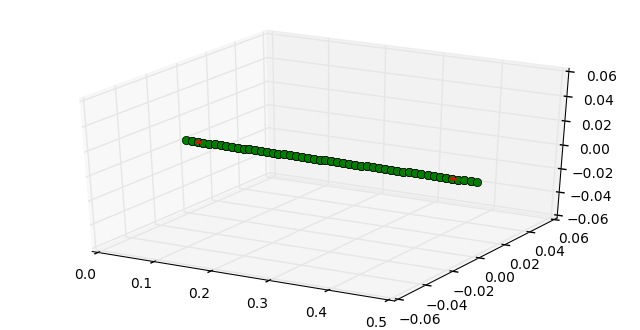

In [429]:
# 画一条直线段
## 从前面高斯积分的计算可知，
##
import numpy as np

start_p = 0.
end_p = 0.5
number_p = 50
ls = np.linspace(start_p,end_p,number_p)
lm = (end_p-start_p)/(len(ls)-1.)

try:
    mesh2 = [[np.array((ls[ii],0,0)), np.array((ls[ii+1],0,0)), lm, 0.01*lm, np.array([0,0,1])] for ii in xrange(len(ls)-1)]
#     mesh2 = [[np.array((ls[ii],0,0)), np.array((ls[ii+1],0,0)), lm, 0.5*lm, np.array([0,0,1])] for ii in xrange(3)]
#     for cell in mesh2:
#         print cell
except Exception as e:
    print e
    raise


try:
    # 设置屋顶基函数 "pos":[0,0]表示正向的线段的线段编号及自由点在线段中的内部编号，'neg':[-1,-1]表示负向的线段是空的（即该屋顶只有一半）
#     rooftops =[{'pos':[0,0],'neg':[1,1]},{'pos':[1,0],'neg':[2,1]},{'pos':[2,0],'neg':[-1,-1]}]
    rooftops =[{'pos':[ii,0],'neg':[ii+1,1]} for ii in xrange(len(mesh2)-1)]
#     rooftops =[{'pos':[ii,0],'neg':[ii+1,1]} for ii in xrange(4)]
    rooftop_attached = [{'Port':[False,0],'V_e':[False,0]} for _ in rooftops]
#     raise
except Exception as e:
    print e
    print rooftops
    raise
    
# 设置端口
try:
    rooftop_attached[2]["Port"] = [True,50]
    rooftop_attached[2]["V_e"] = [True,0]
    rooftop_attached[-3]["Port"] = [True,50]
    rooftop_attached[-3]["V_e"] = [True,scipy.pi/2]
except Exception as e:
    print e
    raise
    

# 将网格进行绘制
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))#创建绘制窗口
ax = fig.gca(projection = "3d")#3d坐标轴
ax.hold
print "=="*10
try:
    for idd, cell in enumerate(mesh2):
        data_x = [cell[0][0], cell[1][0]]
        data_y = [cell[0][1], cell[1][1]]
        data_z = [cell[0][2], cell[1][2]]
        ax.plot(data_x,data_y,data_z,"b-",label=u"处理曲线",linewidth=0.5)#处理曲线
        ax.plot(data_x,data_y,data_z,"go",linewidth=0.5)#处理曲线
    for idd, cell in enumerate(rooftop_attached):
        if cell['Port'][0] == True: 
            # 得到线段编号
            iid_pos = rooftops[idd]['pos'][0]
            iid_neg = rooftops[idd]['neg'][0]
            if iid_pos != -1:
                data_x = [mesh2[iid_pos][0][0], mesh2[iid_pos][1][0]]
                data_y = [mesh2[iid_pos][0][1], mesh2[iid_pos][1][1]]
                data_z = [mesh2[iid_pos][0][2], mesh2[iid_pos][1][2]]
                ax.plot(data_x,data_y,data_z,"r",linewidth=2)#处理曲线
            if iid_neg != -1:
                data_x = [mesh2[iid_neg][0][0], mesh2[iid_neg][1][0]]
                data_y = [mesh2[iid_neg][0][1], mesh2[iid_neg][1][1]]
                data_z = [mesh2[iid_neg][0][2], mesh2[iid_neg][1][2]]
                ax.plot(data_x,data_y,data_z,"g",linewidth=2)#处理曲线
            
        
except Exception as e:
    print e
    print rooftops[idd]
    
    
plt.show()

In [422]:
import numpy as np
from scipy import constants as C
import scipy

# 剖分网格，得到$\{r_m\}$和线段$\{(r_{m-1},r_m,l_m, a_m)\}$
# 设置厚度$a$
mesh = mesh2

# 设置基本参数
epsi = C.epsilon_0 #设置介电常数
mu = C.mu_0 # 设置磁导率
vec = 1./np.sqrt(epsi*mu) # 计算光速

freq = 1200e6 #设置频率
circleFreq = 2*np.pi*freq # 计算圆频率
wavelength = vec/freq # 计算波长
wavenumber = 2*np.pi/wavelength # 计算波数

pi4 = np.pi*4. #预先计算公共因子 
jOmegaMuPi4 = circleFreq*mu/pi4*1.j #预先计算公共因子 
_jOmegaEpsPi4 = -1.j/circleFreq/epsi/pi4 # 预先计算公共因子
jK = 1.j*wavenumber # 预先计算公共因子

# print quads        

如下是经典的积分方程
$$
E^s(r)=j\omega\mu\int_{S'} {I(r')\dfrac{e^{-jkR}}{4\pi R}ds'}
+\dfrac{1}{j\omega\varepsilon}\nabla \int_{S'} \nabla'\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}ds'
$$
其中
$$R=|r-r'|$$

对积分方程进行测试后，就能得到
$$
\int_S f(r)\cdot E^s(r)ds = j\omega\mu\int_L\int_{S'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}ds'ds
+
\dfrac{1}{j\omega\varepsilon} \int_{S}  f(r)\cdot\nabla\int_{S'}  \nabla'\cdot I(r') \dfrac{e^{-jkR}}{4\pi R}ds'ds
$$
该式子等价于(广义)
$$
\int_S f(r)\cdot E^s(r)ds = j\omega\mu\int_S\int_{S'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}ds'ds
-
\dfrac{1}{j\omega\varepsilon} \int_{S} \nabla \cdot f(r)\int_{S'}  \nabla'\cdot I(r') \dfrac{e^{-jkR}}{4\pi R}ds'ds
$$



In [423]:
import numpy as np
# 循环迭代 产生矩阵
try:
    Z = np.zeros((len(rooftops),len(rooftops)),dtype=complexfloating) #阻抗矩阵
except Exception as e:
    print e
    raise    
for n,edge_n in enumerate(rooftops): # 遍历所有测试

    
    for m, edge_m in enumerate(rooftops):
        tempA = 0.
        tempPhi=0.
        # 计算pos线段的测试
        try:
            seg_n_id = edge_n['pos'][0]
            seg_n = mesh[seg_n_id]
            rn1 = seg_n[0]
            an = seg_n[3] #偏置的长度
            ln = seg_n[2] # 线段的长度
            hln = (seg_n[1]-seg_n[0])/ln # 计算测试的向量
            han = seg_n[4]
        except Exception as e:
            print e
            raise    
            
        # 计算pos线段的展开
        try:
            seg_m_id = edge_m['pos'][0]
            seg_m = mesh[seg_m_id]
            rm1 = seg_m[0]
            am = seg_m[3] #偏置的长度
            lm = seg_m[2] # 线段的长度
            hlm = (seg_m[1]-seg_m[0])/lm # 计算测试的向量
            ham = seg_m[4]
        except Exception as e:
            print e
            print 
            raise
        try:
            if seg_n_id==seg_m_id:
                tempA = tempA + A_outer_quad_global(2,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(2,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
            else:
                tempA = tempA + A_outer_quad_global(1,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(1,'pos','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
        except Exception as e:
            print e
            print seg_n
            print seg_m
            raise
        # 计算neg线段的展开
        try:
            seg_m_id = edge_m['neg'][0]
            seg_m = mesh[seg_m_id]
            rm1 = seg_m[0]
            am = seg_m[3] #偏置的长度
            lm = seg_m[2] # 线段的长度
            hlm = (seg_m[1]-seg_m[0])/lm # 计算测试的向量
            ham = seg_m[4]
        except Exception as e:
            print e
            raise
        try:
            if seg_n_id==seg_m_id:
                tempA = tempA + A_outer_quad_global(2,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(2,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
            else:
                tempA = tempA + A_outer_quad_global(1,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(1,'pos','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
        except Exception as e:
            print e
            print seg_n
            print seg_m
            raise
    
        # 计算neg线段的测试
        try:
            seg_n = mesh[edge_n['neg'][0]]
            rn1 = seg_n[0]
            an = seg_n[3] #偏置的长度
            ln = seg_n[2] # 线段的长度
            hln = (seg_n[1]-seg_n[0])/ln # 计算测试的向量
            han = seg_n[4]
        except Exception as e:
            print e
            raise    
    
        # 计算pos线段的展开
        try:
            seg_m_id = edge_m['pos'][0]
            seg_m = mesh[seg_m_id]
            rm1 = seg_m[0]
            am = seg_m[3] #偏置的长度
            lm = seg_m[2] # 线段的长度
            hlm = (seg_m[1]-seg_m[0])/lm # 计算测试的向量
            ham = seg_m[4]
        except Exception as e:
            print e
            raise
        try:
            if seg_n_id==seg_m_id:
                tempA = tempA + A_outer_quad_global(2,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(2,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
            else:
                tempA = tempA + A_outer_quad_global(1,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(1,'neg','pos',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
        except Exception as e:
            print e
            print seg_n
            print seg_m
            raise
        # 计算neg线段的展开
        try:
            seg_m_id = edge_m['neg'][0]
            seg_m = mesh[seg_m_id]
            rm1 = seg_m[0]
            am = seg_m[3] #偏置的长度
            lm = seg_m[2] # 线段的长度
            hlm = (seg_m[1]-seg_m[0])/lm # 计算测试的向量
            ham = seg_m[4]
        except Exception as e:
            print e
            raise
        try:
            if seg_n_id==seg_m_id:
                tempA = tempA + A_outer_quad_global(2,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(2,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
            else:
                tempA = tempA + A_outer_quad_global(1,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
                tempPhi = tempPhi + Phi_outer_quad_global(1,'neg','neg',rn1,hln,han,ln,an,rm1,hlm,ham,lm,am,wavenumber)
        except Exception as e:
            print e
            print seg_n
            print seg_m
            raise
    # 将四个进行相加
#         Z[n][m] = tempPhi
        Z[n][m] = -(tempA*jOmegaMuPi4-tempPhi*_jOmegaEpsPi4)

    #############
    

# print Z_re
# print Z_im
# print Z

# Zinv = scipy.linalg.inv(Z)

In [430]:
import scipy
mesh_attached = rooftop_attached

# 循环迭代 产生右端向量和左端加载量
try:
    V = np.zeros((len(rooftop_attached),1),dtype=complexfloating) #右端向量
except Exception as e:
    print e
    raise    
try:
    L = np.zeros((len(rooftop_attached),1),dtype=complexfloating) #左端加载量
except Exception as e:
    print e
    raise    
for n,rooftop_n in enumerate(rooftop_attached): # 遍历所有测试
    try:
        # 判断是否是加载电压源的单元
        if rooftop_n['Port'][0] == True and rooftop_n['V_e'][0] == True: # 是
            temp = scipy.exp(-1.j*rooftop_n['V_e'][1]) # 根据指定相位差计算右端 step1
            V[n] = temp # step 2
        else: # 不是
            V[n] = float(0) # 指定为右端项为0
    except Exception as e:
        print e
        raise
    try:
        # 判断是否有加载阻抗的单元
        if rooftop_n['Port'][0] == True: # 是
            temp = rooftop_n['Port'][1]
            L[n] = temp # step 2
        else: #
            L[n] = float(0) # 指定为右端项为0
    except Exception as e:
        print e
        raise

# print V_re
# print V_im
# print V
# print L

In [431]:
import scipy.linalg
try:
    M = Z - np.diag(L[:,0])
    I = scipy.linalg.solve(M,V)
    Is = np.zeros((len(mesh),1),dtype=complexfloating)


    for iidd, rooftop in enumerate(rooftops):
        Is[rooftop['pos'][0]] = Is[rooftop['pos'][0]]+I[iidd]
        Is[rooftop['neg'][0]] = Is[rooftop['neg'][0]]+I[iidd]

    for iid, meshcell in enumerate(mesh):
        Is[iid] = Is[iid]*meshcell[3]

    Is = Is*0.5
except Exception as e:
    print e

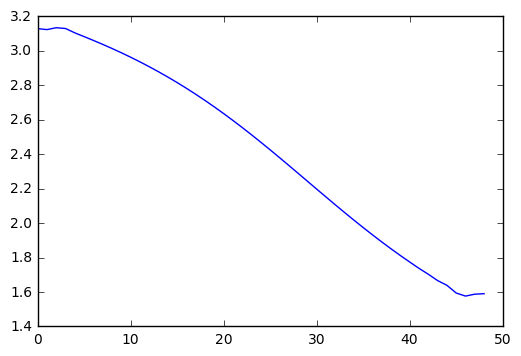

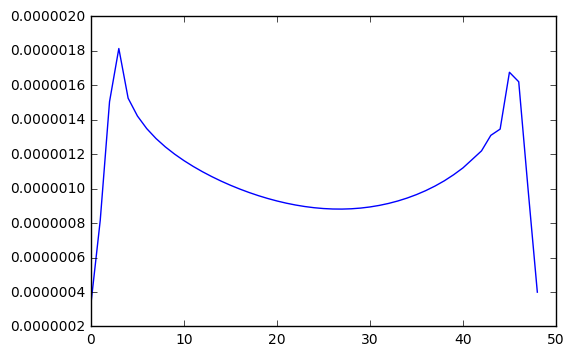

In [432]:
# 将网格进行绘制
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

plt.plot(xrange(len(Is)),scipy.angle(Is))
plt.show()

plt.plot(xrange(len(Is)),scipy.absolute(Is))
plt.show()

In [433]:


import numpy as np
import scipy

# 定义与集合相应的方向图
def genRadiationPattern(ths_phs):
    RPs_th = [0 for _ in ths_phs]
    RPs_ph = [0 for _ in ths_phs]

    # 定义一个辅助空间保存各个单元的因子，其作用是利用向量乘积的办法计算远处的电场
    try:
        RP_sep_th = np.zeros((len(mesh),1),dtype=complexfloating) # 定义空间，并初始化为零
        RP_sep_ph = np.zeros((len(mesh),1),dtype=complexfloating) # 定义空间，并初始化为零
    except Exception as e:
        print e
        raise   

    # 对方向角度中的集合进行迭代
    for iid,th_ph in enumerate(ths_phs):

        th0,ph0 = th_ph # 俯仰角和方位角
        # 根据俯仰角和方位角计算三个向量
        jk_bar = np.array([scipy.sin(th0)*scipy.cos(ph0),scipy.sin(th0)*scipy.sin(ph0),scipy.cos(th0)])*wavenumber*1.j # 1.j*k向量
        th_hat = np.array([scipy.cos(th0)*scipy.cos(ph0),scipy.cos(th0)*scipy.sin(ph0),-scipy.sin(th0)]) # theta分量
        ph_hat = np.array([-scipy.sin(ph0),scipy.cos(ph0),0]) # phi分量

        # 对网格进行迭代
        for n,seg_n in enumerate(mesh): 
            try:
                r_nc = (seg_n[0]+seg_n[1])/2. # 单元的中间点
                temp_e = scipy.exp( scipy.dot(jk_bar,r_nc) ) # 方向图step1
                temp_th = scipy.dot((seg_n[1]-seg_n[0]),th_hat) # 方向图step2
                temp_ph = scipy.dot((seg_n[1]-seg_n[0]),ph_hat) # 方向图step2
                if scipy.absolute(temp_th)<1.e-10: 
                    RP_sep_th[n] = 0. # 方向图step3
                else:
                    RP_sep_th[n] = temp_th*temp_e # 方向图step3
                if scipy.absolute(temp_ph)<1.e-10: 
                    RP_sep_ph[n] = 0. # 方向图step3
                else:
                    RP_sep_ph[n] = temp_ph*temp_e # 方向图step3
    #             print RP_sep[n]
            except Exception as e:
                print e
                raise
        try:         
            RPs_th[iid] = scipy.sum(scipy.dot(Is[:,0],RP_sep_th)) # 将各个单元的方向图进行综合
            RPs_ph[iid] = scipy.sum(scipy.dot(Is[:,0],RP_sep_ph)) # 将各个单元的方向图进行综合
        except Exception as e:
            print e
            raise
    return [RPs_th,RPs_ph]

relative value


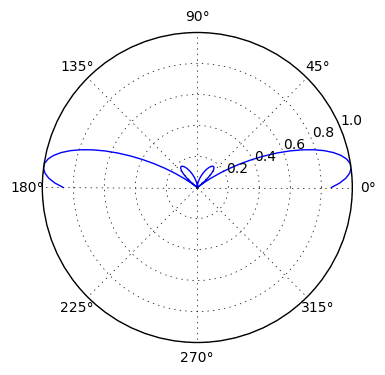

absolute value


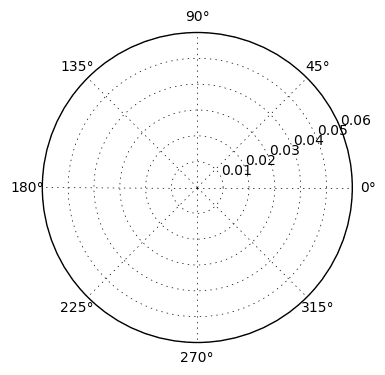

relative value


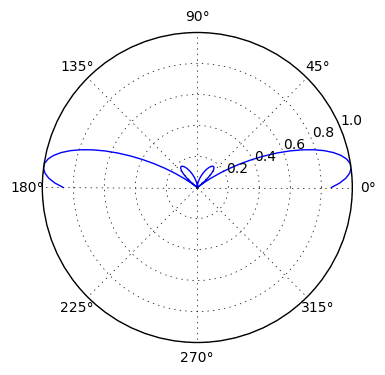

In [434]:
# 指定方向角集合
ths = np.linspace(0,np.pi,101)
ths_phs = [(xx,np.pi*0.) for xx in ths]
            
RPs_th,RPs_ph = genRadiationPattern(ths_phs)

import matplotlib.pylab as plt

try:
    aug_rp_th = scipy.absolute(RPs_th)
    max_rp_th = np.max(aug_rp_th)
    if max_rp_th != 0: 
        print "relative value"
        plt.polar(ths,aug_rp_th/max_rp_th)
        plt.show()        
    else:
        print "absolute value"
        plt.polar(ths,aug_rp_th)
        plt.show()
        pass
except Exception as e:
    print e

try:
    aug_rp_ph = scipy.absolute(RPs_ph)
    max_rp_ph = np.max(aug_rp_ph)
    if max_rp_ph != 0: 
        print "relative value"
        plt.polar(ths,aug_rp_ph/max_rp_ph)
        plt.show()
    else:
        print "absolute value"
        plt.polar(ths,aug_rp_ph)
        plt.show()
except Exception as e:
    print e
    
try:
    aug_rp = scipy.sqrt(scipy.absolute(RPs_ph)**2+scipy.absolute(RPs_th)**2)
    max_rp = np.max(aug_rp)
    if max_rp != 0: 
        print "relative value"
        plt.polar(ths,aug_rp/max_rp)
        plt.show()
    else:
        print "absolute value"
        plt.polar(ths,aug_rp)
        plt.show()
except Exception as e:
    print e